In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [184]:
job="manager_roles"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [185]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Kenvue,"Solution Design Manager, R&D Digital Platforms...",Bengaluru,750000.0,"Image processing, Computer vision, Big data, S...",3.6,Manager Roles
1,Polygon,Project Manager,Remote,0.0,"CI/CD, Kanban, Microservices, Product developm...",3.3,Manager Roles
2,[x]cube LABS,Project Manager,Hyderābād,450000.0,"Mobile applications, Application development, ...",4.4,Manager Roles
3,Tech Alchemy,Technical Project Manager,Pune,450000.0,"Hospitality, Azure, Kanban, Business analysis,...",4.2,Manager Roles
4,Boston Consulting Group,¿Global IT Platform Engineer Manager¿,Gurgaon,850000.0,"JavaScript, REST, APIs, ServiceNow, Agile",4.3,Manager Roles


In [186]:
df.isnull().sum()

company_name               0
job_role                   0
job_location               0
salary_pa                  0
skills                    15
company_rating           103
standardized_job_role      0
dtype: int64

In [187]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [188]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
1,Polygon,Project Manager,Remote,0.0,"CI/CD, Kanban, Microservices, Product developm...",3.3,Manager Roles
9,PepsiCo,Associate Manager,Hyderābād,0.0,"Microsoft Powerpoint, Power BI, Microsoft Exce...",3.9,Manager Roles
10,Kelly Services Internal,"Manager, Risk Intelligence",Bengaluru,0.0,"Customer service, Data analysis skills, SOX, O...",3.3,Manager Roles
12,Maruti Suzuki India Ltd,Sr. Manager / Assistant General Manager (Busin...,Delhi,0.0,"Power BI, Research, Tableau, SQL, Team management",3.8,Manager Roles
16,LeanDNA,Sr. Implementation Manager,Remote,0.0,"Jira, Supply chain, ERP systems, SQL, Project ...",4.8,Manager Roles
...,...,...,...,...,...,...,...
283,Sammon Infra,MECHANICAL: – SR. MANAGER / MANAGER / DY MANAG...,Pune,0.0,Mechanical engineering,3.0,Manager Roles
288,Invesco,"Manager, Infra Stblty",Hyderābād,0.0,"CSS, Encryption, Network management, Splunk, S...",3.8,Manager Roles
291,Google,Data Center Technical Operations Manager,Delhi,0.0,"Mechanical engineering, Facilities management,...",4.3,Manager Roles
293,FactSet Research Systems,Manager/Lead Infrastructure Operations Engineer,Hyderābād,0.0,"Cloud infrastructure, Azure, Kubernetes, Ansib...",3.9,Manager Roles


### Filling the null values by replacing with average salary of company rating

In [190]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [191]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [192]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Kenvue,"Solution Design Manager, R&D Digital Platforms...",Bengaluru,7.5,"Image processing, Computer vision, Big data, S...",3.6,Manager Roles
1,Polygon,Project Manager,Remote,3.5,"CI/CD, Kanban, Microservices, Product developm...",3.3,Manager Roles
2,[x]cube LABS,Project Manager,Hyderābād,4.5,"Mobile applications, Application development, ...",4.4,Manager Roles
3,Tech Alchemy,Technical Project Manager,Pune,4.5,"Hospitality, Azure, Kanban, Business analysis,...",4.2,Manager Roles
4,Boston Consulting Group,¿Global IT Platform Engineer Manager¿,Gurgaon,8.5,"JavaScript, REST, APIs, ServiceNow, Agile",4.3,Manager Roles
...,...,...,...,...,...,...,...
296,QuEST Global,Battery Technology Manager,Bengaluru,5.5,"Project management, Budgeting, Leadership, Com...",3.7,Manager Roles
297,MIND A MEND,Website Content & SEO Manager,Remote,4.5,"Social media management, Keyword research, Con...",4.3,Manager Roles
298,Good Business Lab,"Senior Manager, Communications",India,9.0,Content creation,4.6,Manager Roles
299,Workday,"Manager, Technical Writing",Chennai,48.0,"Management, Enterprise Software, Leadership, C...",4.1,Manager Roles


In [193]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [194]:
df.describe()

,salary_lpa,company_rating
count,301.000000,301.000000
mean,9.453457,2.532890
std,8.648475,1.894733
min,0.360000,0.000000
25%,5.000000,0.000000
50%,6.500000,3.600000
75%,10.800000,4.000000
max,48.000000,5.000000


In [195]:
df.nunique()

company_name             262
job_role                 247
job_location              49
salary_lpa                78
skills                   279
company_rating            31
standardized_job_role      1
dtype: int64

In [196]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [198]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [199]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                    Skill  Count
50   communication skills     52
12     project management     47
38                english     46
49        analysis skills     45
168                 sales     31
..                    ...    ...
180    financial modeling      1
182    customer retention      1
185               kannada      1
187              assembly      1
314               workday      1

[315 rows x 2 columns]


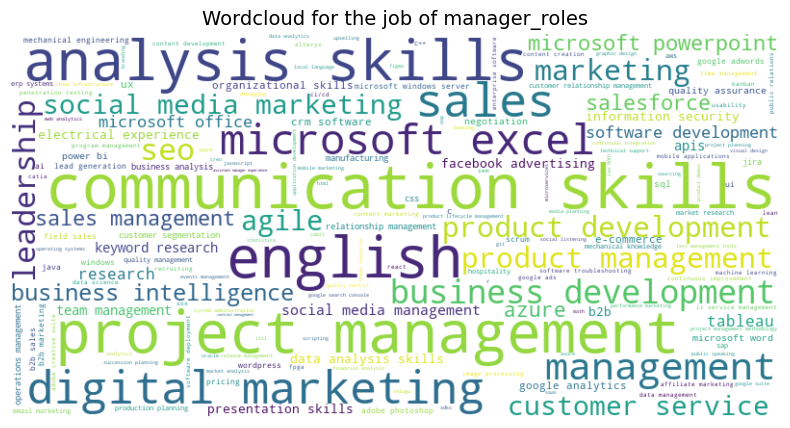

In [200]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


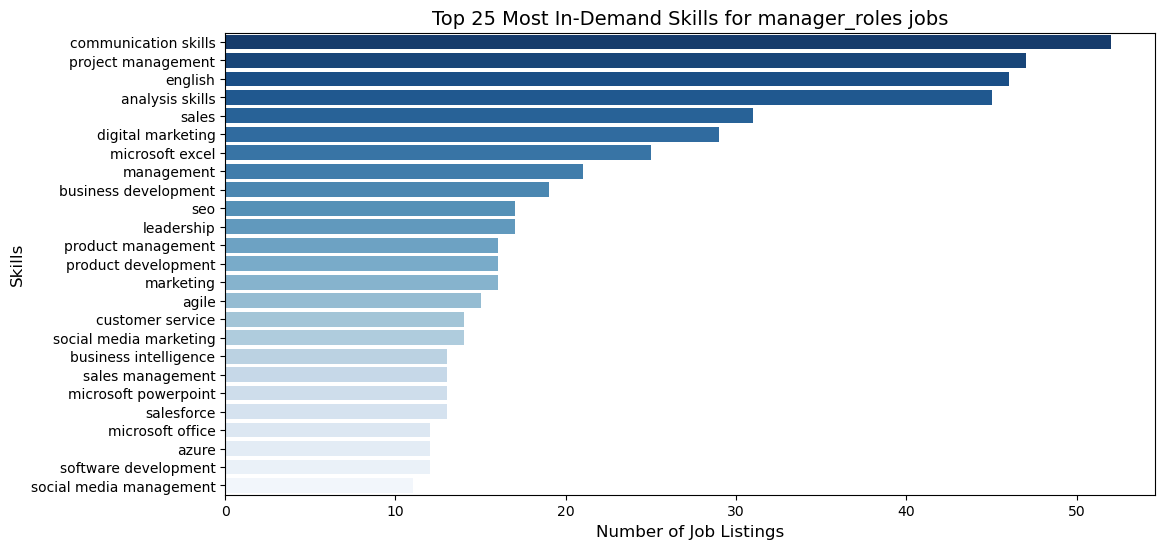

In [201]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [203]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                            company_name  salary_lpa
89                       Electronic Arts   48.000000
244                              Workday   48.000000
42                            BrandStory   48.000000
232                              Ubisoft   48.000000
199                SMV CASTINGS AND ENGG   43.200000
220  Take-Two Interactive Software, Inc.   42.000000
17                                 Amgen   42.000000
243                              Whatfix   42.000000
14    Amazon Pay (India) Private Limited   30.000000
183                              PepsiCo   26.867647


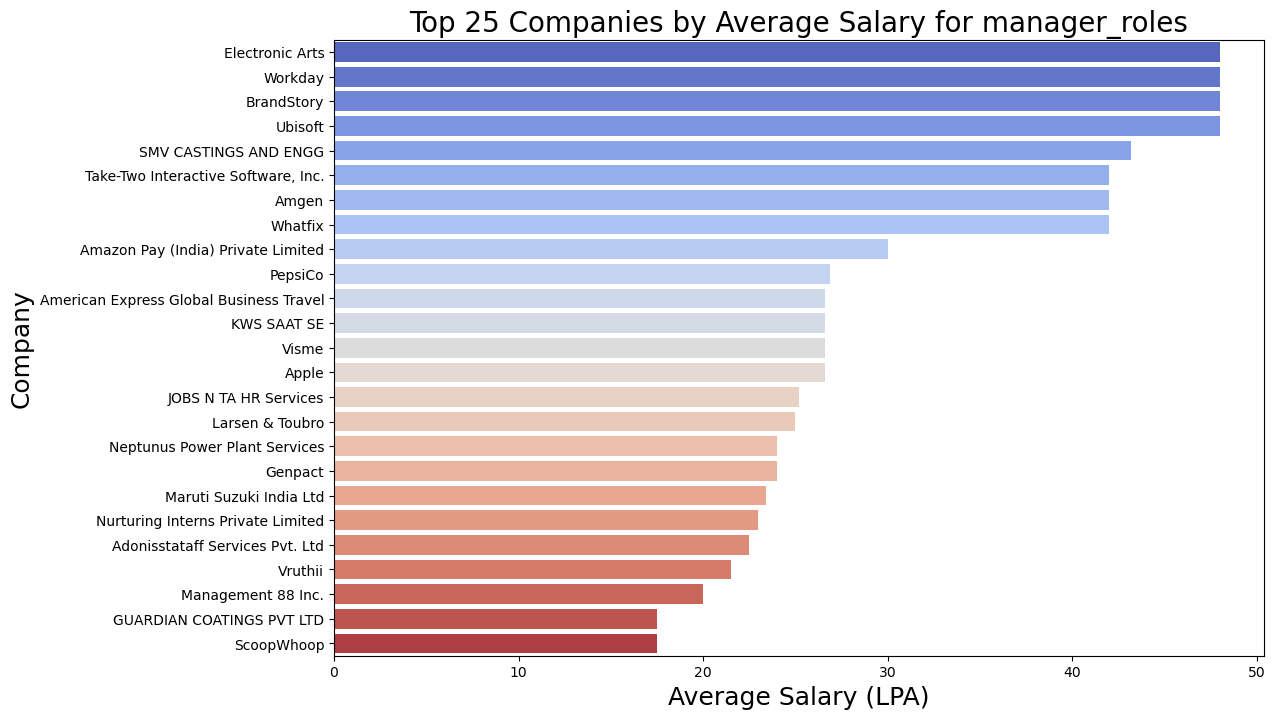

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

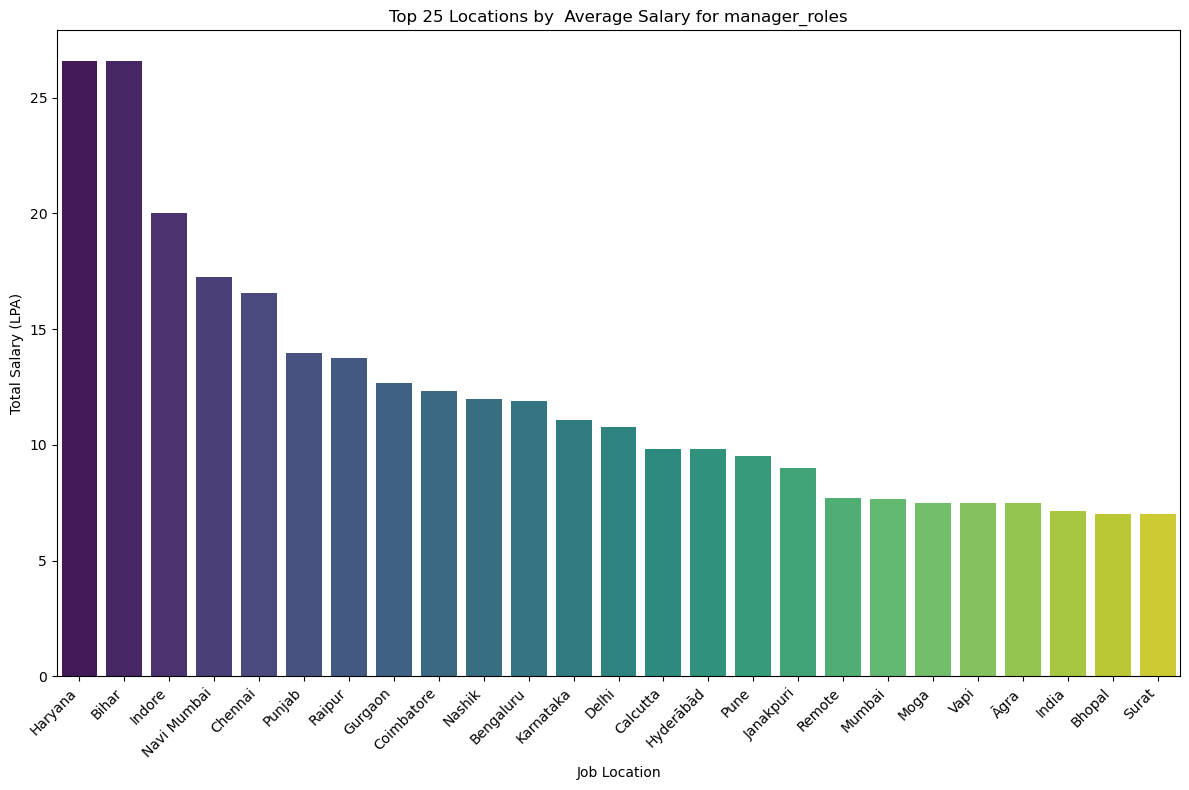

In [206]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

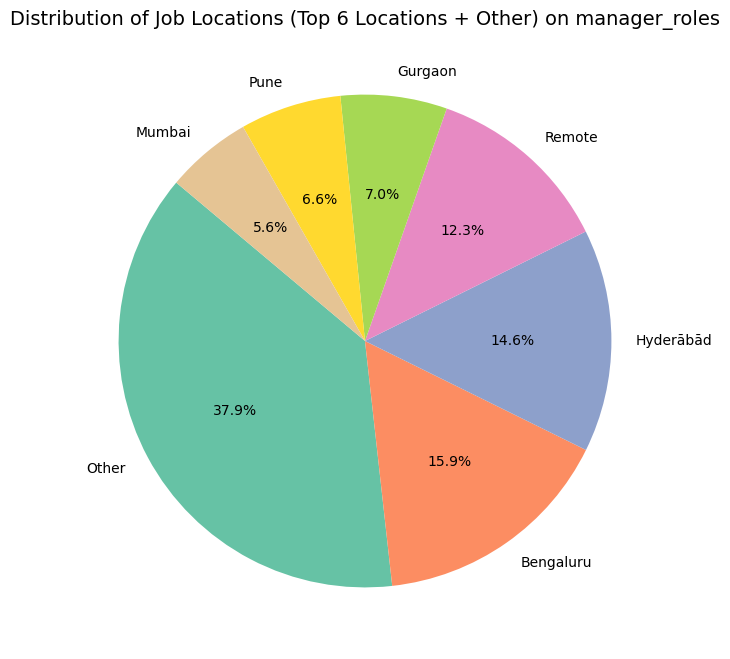

In [207]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

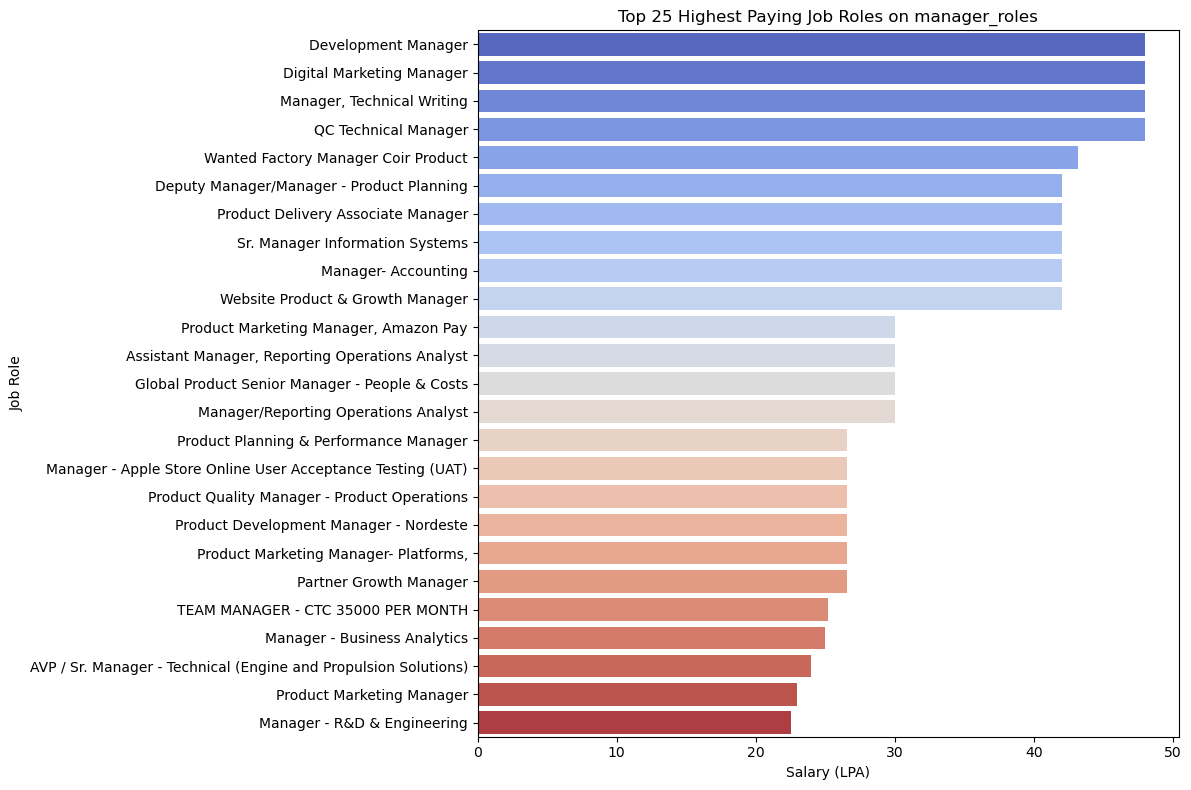

In [209]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [211]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_27536\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


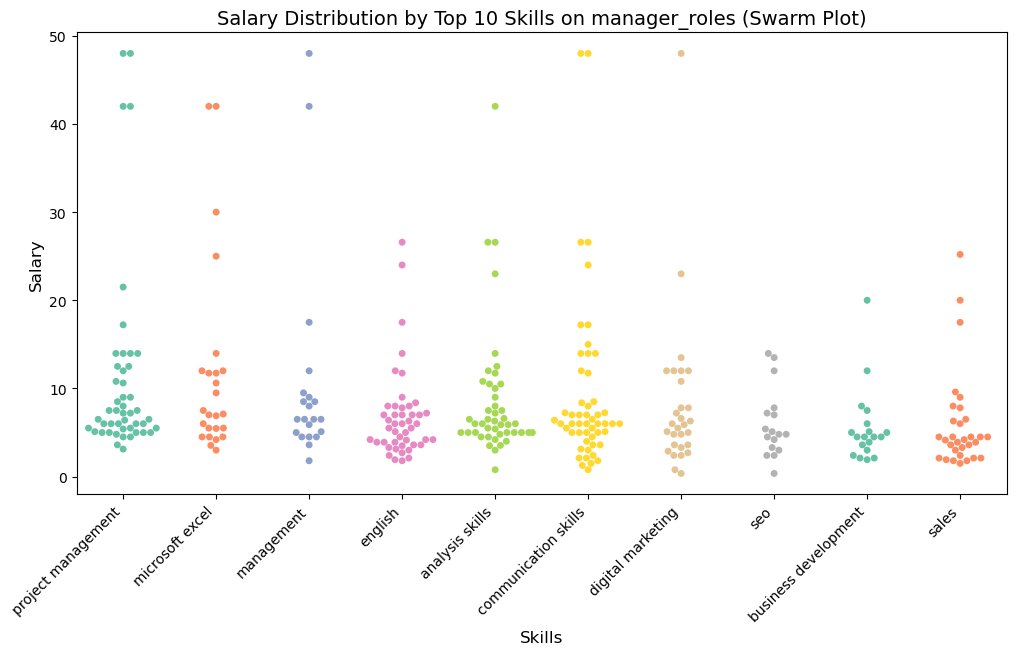

In [212]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

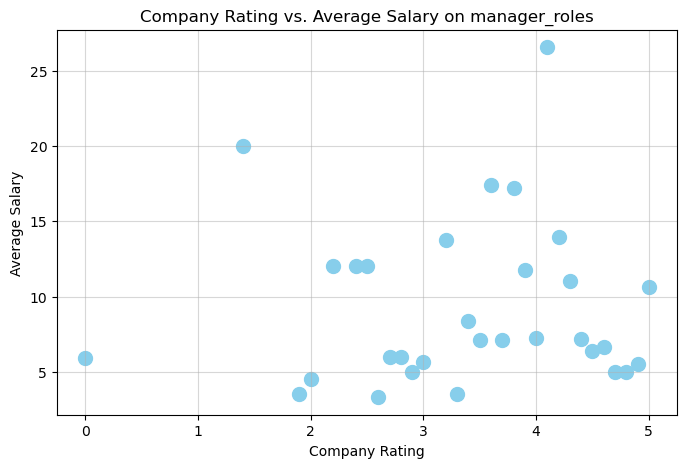

In [214]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [215]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.06862230326388308